# Motivation:
With increasing urbanization and developing IT centers such as Hyderabad, more and more people move to metropolitan cities to find opportunities. The first priority of most entrants is renting a house as it is not always feasible to purchase property. The rental market is much larger in comparison to property ownership, particularly in rapidly developing metropolitan cities. With such high demand, a precise rental price prediction model can help individuals make the appropriate financial choices and help property owners determine competitive rates.

# Rental Price Prediction Using Machine Learning  

## Overview  
This project aims to predict rental prices in Hyderabad based on various independent features such as location, number of rooms, amenities, and more. Using **Python, Pandas, Scikit-Learn, and XGBoost**, I explored data patterns, built predictive models, and evaluated their performance.  

## Tech Stack  
- **Programming:** Python  
- **Libraries:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-Learn, XGBoost  
- **ML Models:** Linear Regression, Random Forest, XGBoost  

## Key Steps  
1. **Exploratory Data Analysis (EDA)** – Visualized data using heatmaps and feature distributions.  
2. **Data Preprocessing** – Handled missing values, encoded categorical features, and scaled numerical features.  
3. **Model Development** – Implemented and compared **Linear Regression, Random Forest, and XGBoost**.  
4. **Hyperparameter Tuning** – Optimized model performance to enhance prediction accuracy.  
5. **Evaluation** – Measured performance using **RMSE, MAE, and R² Score**, with XGBoost achieving **R² = 0.8713**.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv('copy_hyd.csv')

In [ ]:
df.head()

,Unnamed: 0,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality
0,0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda"
1,1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli, Outer Ring Road"
2,2,1 BHK Builder Floor,Immediately,Furnished,Bachelors/Family,read more,"18,000",Gachibowli
3,3,3 BHK Apartment,Immediately,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet, NH"
4,4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",Raghavendra Colony kondapur


In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df.head()

,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality
0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda"
1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli, Outer Ring Road"
2,1 BHK Builder Floor,Immediately,Furnished,Bachelors/Family,read more,"18,000",Gachibowli
3,3 BHK Apartment,Immediately,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet, NH"
4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",Raghavendra Colony kondapur


In [ ]:
df['Bedrooms']=df['Bedrooms'].str.extract('(\d)').astype(float)

In [ ]:
df.head()

,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality
0,3.0,2,Furnished,Bachelors/Family,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda"
1,3.0,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli, Outer Ring Road"
2,1.0,Immediately,Furnished,Bachelors/Family,read more,"18,000",Gachibowli
3,3.0,Immediately,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet, NH"
4,3.0,2,Semi-Furnished,Family,1580 sqft,"23,000",Raghavendra Colony kondapur


In [ ]:
df['Bathrooms']=pd.to_numeric(df['Bathrooms'],errors='coerce')

In [ ]:
df.head()

,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality
0,3.0,2.0,Furnished,Bachelors/Family,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda"
1,3.0,2.0,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli, Outer Ring Road"
2,1.0,NaN,Furnished,Bachelors/Family,read more,"18,000",Gachibowli
3,3.0,NaN,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet, NH"
4,3.0,2.0,Semi-Furnished,Family,1580 sqft,"23,000",Raghavendra Colony kondapur


In [ ]:
df.isnull().sum()

Bedrooms       14
Bathrooms     290
Furnishing      0
Tennants        1
Area           22
Price           0
Locality        0
dtype: int64

In [ ]:
df.describe()

,Bedrooms,Bathrooms
count,1157.000000,881.000000
mean,2.477096,1.701476
std,0.647489,0.707499
min,1.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,3.000000,2.000000
max,5.000000,5.000000


In [ ]:
df['Price']=df['Price'].str.replace(',','').astype(float)

In [ ]:
df.head()

,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality
0,3.0,2.0,Furnished,Bachelors/Family,1800 sqft,34000.0,"Bhagyalaxmi Nagar, Kavadiguda"
1,3.0,2.0,Semi-Furnished,Family,2500 sqft,45000.0,"Gachibowli, Outer Ring Road"
2,1.0,NaN,Furnished,Bachelors/Family,read more,18000.0,Gachibowli
3,3.0,NaN,Furnished,Bachelors/Family,2160 sqft,40000.0,"Moosapet, NH"
4,3.0,2.0,Semi-Furnished,Family,1580 sqft,23000.0,Raghavendra Colony kondapur


In [ ]:
df['Area'] = df['Area'].str.replace(' sqft', '', regex=True).str.replace(',', '', regex=True)
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

In [ ]:
df.head()

,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality
0,3.0,2.0,Furnished,Bachelors/Family,1800.0,34000.0,"Bhagyalaxmi Nagar, Kavadiguda"
1,3.0,2.0,Semi-Furnished,Family,2500.0,45000.0,"Gachibowli, Outer Ring Road"
2,1.0,NaN,Furnished,Bachelors/Family,NaN,18000.0,Gachibowli
3,3.0,NaN,Furnished,Bachelors/Family,2160.0,40000.0,"Moosapet, NH"
4,3.0,2.0,Semi-Furnished,Family,1580.0,23000.0,Raghavendra Colony kondapur


In [ ]:
df.isnull().sum()

Bedrooms       14
Bathrooms     290
Furnishing      0
Tennants        1
Area          144
Price           0
Locality        0
dtype: int64

In [ ]:
df['Bathrooms'].fillna(df['Bathrooms'].median(), inplace=True)
df['Area'].fillna(df['Area'].median(), inplace=True)
df['Bedrooms'].fillna(df['Bedrooms'].median(), inplace=True)

C:\Users\akhil\AppData\Local\Temp\ipykernel_21404\2349149529.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bathrooms'].fillna(df['Bathrooms'].median(), inplace=True)
C:\Users\akhil\AppData\Local\Temp\ipykernel_21404\2349149529.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [ ]:
df.head()

,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality
0,3.0,2.0,Furnished,Bachelors/Family,1800.0,34000.0,"Bhagyalaxmi Nagar, Kavadiguda"
1,3.0,2.0,Semi-Furnished,Family,2500.0,45000.0,"Gachibowli, Outer Ring Road"
2,1.0,2.0,Furnished,Bachelors/Family,1400.0,18000.0,Gachibowli
3,3.0,2.0,Furnished,Bachelors/Family,2160.0,40000.0,"Moosapet, NH"
4,3.0,2.0,Semi-Furnished,Family,1580.0,23000.0,Raghavendra Colony kondapur


In [ ]:
df.isnull().sum()

Bedrooms      0
Bathrooms     0
Furnishing    0
Tennants      1
Area          0
Price         0
Locality      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Bedrooms      0
Bathrooms     0
Furnishing    0
Tennants      0
Area          0
Price         0
Locality      0
dtype: int64

In [ ]:
df['Locality'].describe()

count          1170
unique          637
top        Attapur 
freq             22
Name: Locality, dtype: object

In [ ]:
df['Furnishing'].describe()

count               1170
unique                 5
top       Semi-Furnished
freq                 622
Name: Furnishing, dtype: object

In [ ]:
df['Furnishing'].value_counts()

Furnishing
Semi-Furnished      622
Unfurnished         334
Furnished           186
Bachelors/Family     24
Family                4
Name: count, dtype: int64

In [ ]:
df['Tennants'].describe()

count                 1170
unique                   6
top       Bachelors/Family
freq                   694
Name: Tennants, dtype: object

In [ ]:
df=df.drop(['Tennants'],axis=1)

In [ ]:
df.head()

,Bedrooms,Bathrooms,Furnishing,Area,Price,Locality
0,3.0,2.0,Furnished,1800.0,34000.0,"Bhagyalaxmi Nagar, Kavadiguda"
1,3.0,2.0,Semi-Furnished,2500.0,45000.0,"Gachibowli, Outer Ring Road"
2,1.0,2.0,Furnished,1400.0,18000.0,Gachibowli
3,3.0,2.0,Furnished,2160.0,40000.0,"Moosapet, NH"
4,3.0,2.0,Semi-Furnished,1580.0,23000.0,Raghavendra Colony kondapur


In [ ]:
df = df[df["Furnishing"].isin(["Unfurnished", "Semi-Furnished", "Furnished"])]

In [ ]:
df['Furnishing'].value_counts()

Furnishing
Semi-Furnished    622
Unfurnished       334
Furnished         186
Name: count, dtype: int64

In [ ]:
df['Furnishing']=df['Furnishing'].map({'Unfurnished':0,'Semi-Furnished':1,'Furnished':2})

In [ ]:
df['Furnishing'].value_counts()

Furnishing
1    622
0    334
2    186
Name: count, dtype: int64

In [ ]:
df['Locality'].describe()

count          1142
unique          633
top        Attapur 
freq             21
Name: Locality, dtype: object

In [ ]:
locality_price_map = df.groupby("Locality")["Price"].mean()
df["Locality"] = df["Locality"].map(locality_price_map)

In [ ]:
df.head()

,Bedrooms,Bathrooms,Furnishing,Area,Price,Locality
0,3.0,2.0,2,1800.0,34000.0,34000.000000
1,3.0,2.0,1,2500.0,45000.0,37538.461538
2,1.0,2.0,2,1400.0,18000.0,21500.000000
3,3.0,2.0,2,2160.0,40000.0,40000.000000
4,3.0,2.0,1,1580.0,23000.0,23000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1142 entries, 0 to 1170
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bedrooms    1142 non-null   float64
 1   Bathrooms   1142 non-null   float64
 2   Furnishing  1142 non-null   int64  
 3   Area        1142 non-null   float64
 4   Price       1142 non-null   float64
 5   Locality    1142 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.5 KB


In [ ]:
df.isnull().sum()

Bedrooms      0
Bathrooms     0
Furnishing    0
Area          0
Price         0
Locality      0
dtype: int64

In [ ]:
df.describe()

,Bedrooms,Bathrooms,Furnishing,Area,Price,Locality
count,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000
mean,2.483363,1.769702,0.870403,1504.980736,22170.008757,22170.008757
std,0.648050,0.633862,0.662518,1226.737904,10997.611297,9926.080212
min,1.000000,1.000000,0.000000,150.000000,5000.000000,5000.000000
25%,2.000000,1.000000,0.000000,1200.000000,14000.000000,15000.000000
50%,3.000000,2.000000,1.000000,1400.000000,20000.000000,20000.000000
75%,3.000000,2.000000,1.000000,1665.000000,30000.000000,28166.666667
max,5.000000,5.000000,2.000000,40000.000000,50000.000000,50000.000000


<Axes: xlabel='Price', ylabel='Count'>

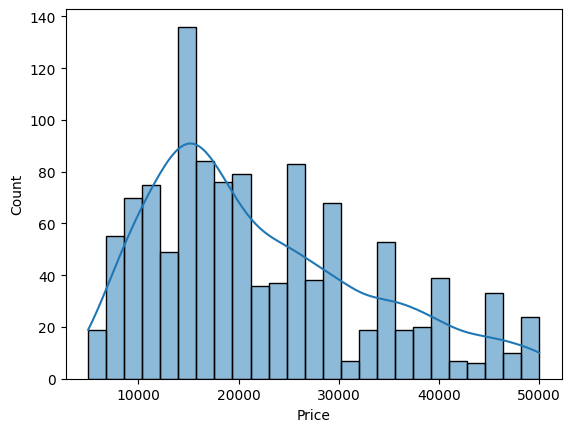

In [ ]:
sns.histplot(df['Price'],bins=25,kde=True)

In [ ]:
df['Price']=np.log1p(df['Price'])

<Axes: xlabel='Price', ylabel='Count'>

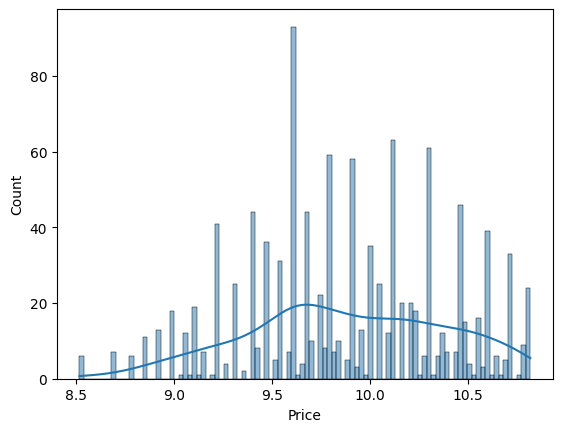

In [ ]:
sns.histplot(df['Price'],bins=100,kde=True)

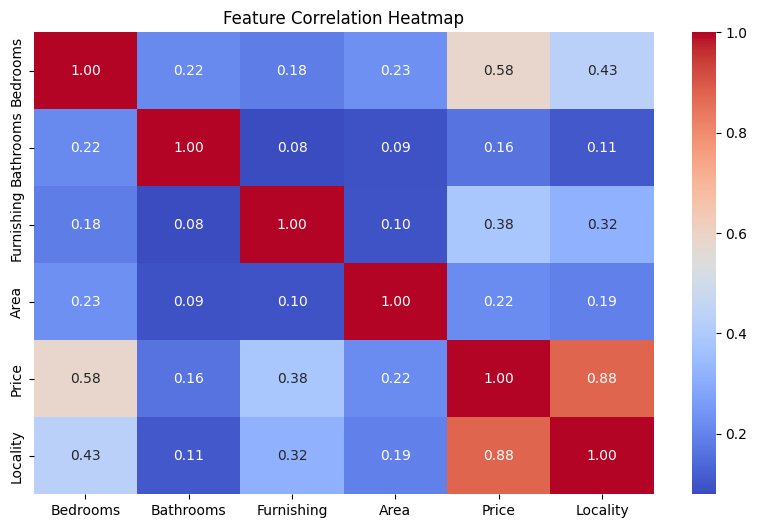

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

<Axes: xlabel='Price'>

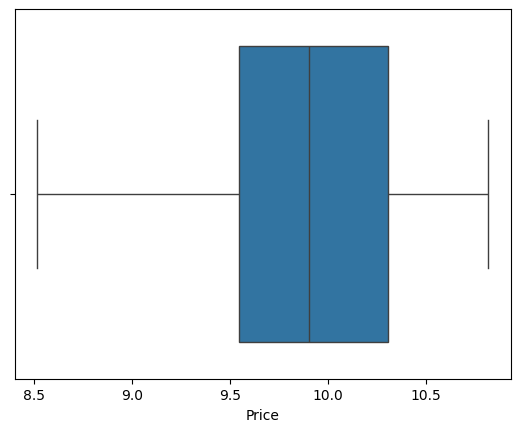

In [ ]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='Area', ylabel='Price'>

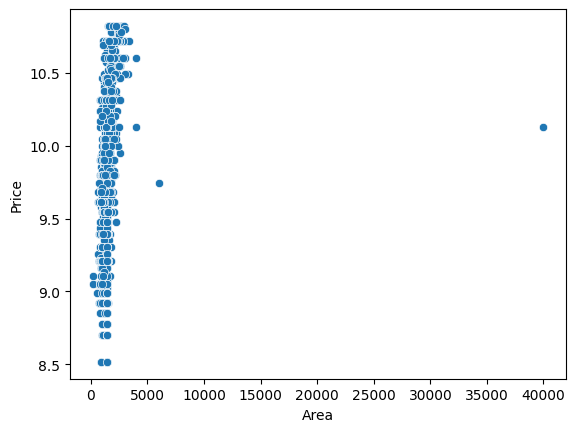

In [ ]:
sns.scatterplot(x='Area',y='Price',data=df)

<Axes: xlabel='Area'>

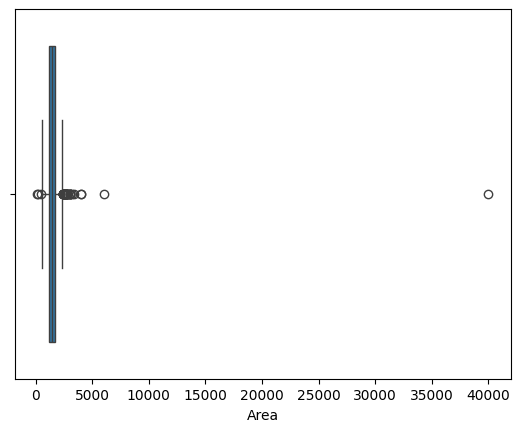

In [ ]:
sns.boxplot(x=df['Area'])

In [ ]:
Q1 = df["Area"].quantile(0.25)
Q3 = df["Area"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["Area"] >= lower_bound) & (df["Area"] <= upper_bound)]

<Axes: xlabel='Area'>

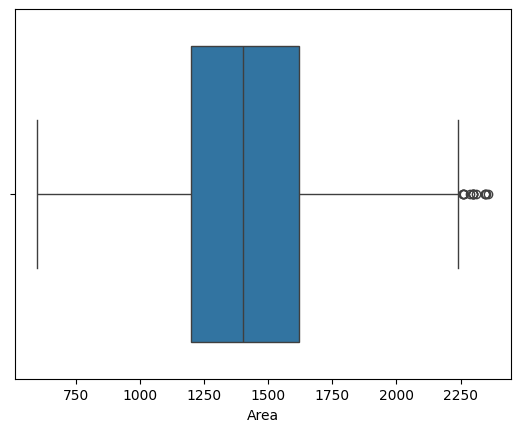

In [ ]:
sns.boxplot(x=df['Area'])

<Axes: xlabel='Area', ylabel='Price'>

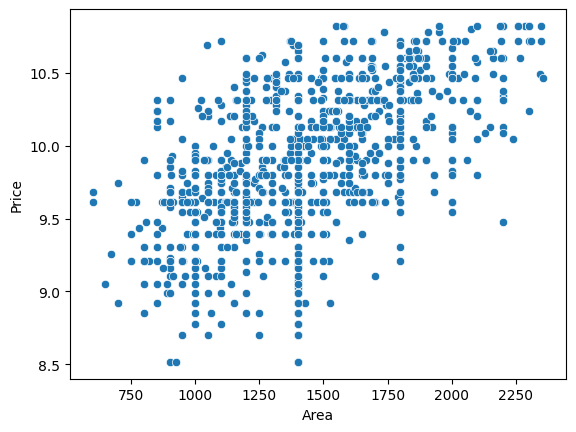

In [ ]:
sns.scatterplot(x='Area',y='Price',data=df)

<Axes: xlabel='Bedrooms', ylabel='Price'>

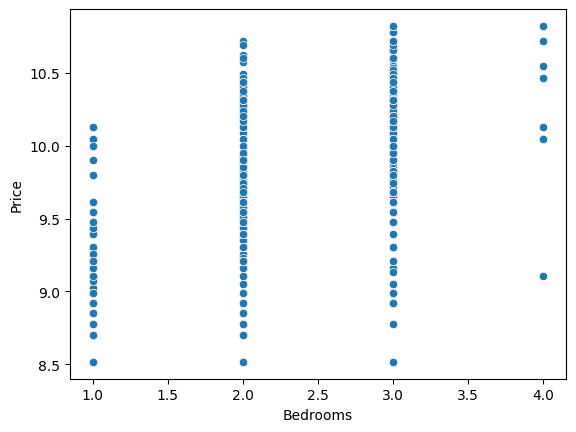

In [ ]:
sns.scatterplot(x='Bedrooms',y='Price',data=df)

<Axes: xlabel='Bathrooms', ylabel='Price'>

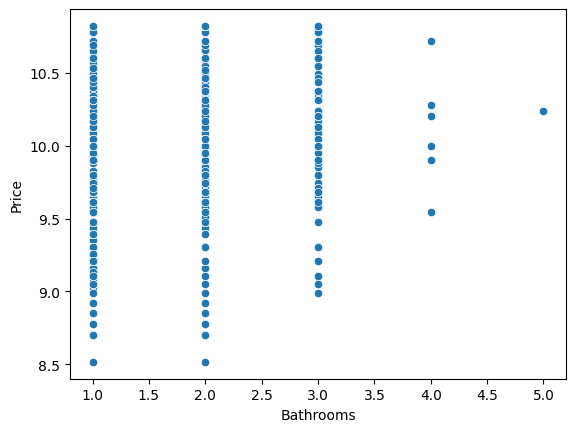

In [ ]:
sns.scatterplot(x='Bathrooms',y='Price',data=df)

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Price'])
y=df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (870, 5), Test set: (218, 5)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
linear=LinearRegression()
linear.fit(X_train,y_train)
y_pred_linear=linear.predict(X_test)
mae=mean_absolute_error(y_test,y_pred_linear)
mse=mean_squared_error(y_test,y_pred_linear)
r2=r2_score(y_test,y_pred_linear)
print("Linear Regression Performane Metrics")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2: {r2}")

Linear Regression Performane Metrics
Mean Absolute Error: 0.14339482108966622
Mean Squared Error: 0.036974775071379466
R^2: 0.8443899136816104


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
random=RandomForestRegressor(n_estimators=100,random_state=42)
random.fit(X_train,y_train)
y_pred_random=random.predict(X_test)
mae_random=mean_absolute_error(y_test,y_pred_random)
mse_random=mean_squared_error(y_test,y_pred_random)
r2_random=r2_score(y_test,y_pred_random)
print("Random Forest Performane Metrics")
print(f"Mean Absolute Error: {mae_random}")
print(f"Mean Squared Error: {mse_random}")
print(f"R^2: {r2_random}")

Random Forest Performane Metrics
Mean Absolute Error: 0.11905056629724185
Mean Squared Error: 0.03084956566242523
R^2: 0.8701681466257065


In [ ]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 487.6 kB/s eta 0:04:17
   ---------------------------------------- 0.2/124.9 MB 1.5 MB/s eta 0:01:25
   ---------------------------------------- 0.2/124.9 MB 1.4 MB/s eta 0:01:32
   ---------------------------------------- 0.6/124.9 MB 2.7 MB/s eta 0:00:47
   ---------------------------------------- 0.8/124.9 MB 2.9 MB/s eta 0:00:43
   ---------------------------------------- 0.9/124.9 MB 3.1 MB/s eta 0:00:40
   ---------------------------------------- 1.1/124.9 MB 3.2 MB/s eta 0:00:39
   ---------------------------------------- 1.4/124.9 MB 3.3 MB/s eta 0:00:38
    --------------------------------------- 1.6/124.9 MB 3.4 MB/s eta 0:00:36
    --------------------------------------- 1.8/124.9 MB 3.6 MB/s eta 0:00:35
    --------------------------------------- 2.1/124.9 MB 3.7 MB/s eta 0:00:3


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\akhil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
xg=XGBRegressor(n_estimators=100,random_state=42,learnig_rate=0.1)
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
mae_xg=mean_absolute_error(y_test,y_pred_xg)
mse_xg=mean_squared_error(y_test,y_pred_xg)
r2_xg=r2_score(y_test,y_pred_xg)
print("XGB Regressor Performane Metrics")
print(f"Mean Absolute Error: {mae_xg}")
print(f"Mean Squared Error: {mse_xg}")
print(f"R^2: {r2_xg}")

XGB Regressor Performane Metrics
Mean Absolute Error: 0.13707879721828214
Mean Squared Error: 0.03518730329767769
R^2: 0.851912573020591


C:\Users\akhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:57:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "learnig_rate" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE": [mae, mae_random, mae_xg],
    "MSE": [mse, mse_random, mse_xg],
    "R² Score": [r2,r2_random, r2_xg]
})

print(results.sort_values(by="R² Score", ascending=False))

               Model       MAE       MSE  R² Score
1      Random Forest  0.119051  0.030850  0.870168
2            XGBoost  0.137079  0.035187  0.851913
0  Linear Regression  0.143395  0.036975  0.844390


In [ ]:
random_params = {"max_depth": [5, 8, 15, None, 10],
              "max_features": [5, 7, "auto", 8],
              "min_samples_split": [2, 8, 15, 20],
              "n_estimators": [100, 200, 500, 1000]}
xg_params = {"learning_rate": [0.1, 0.01],
                   "max_depth": [5, 8, 12, 20, 30],
                   "n_estimators": [100, 200, 300],
                   "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [ ]:
randomcv_models = [
                   ("RF", RandomForestRegressor(), random_params),
                   ("XGboost",XGBRegressor(),xg_params)
                   
                   ]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\akhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
78 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pac

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'min_samples_split': 8, 'max_features': 8, 'max_depth': 8}
---------------- Best Params for XGboost -------------------
{'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, min_samples_split=8,min_samples_leaf=2, max_features=8, max_depth=8, 
                                                     n_jobs=-1),
     "Xgboost Regressor":XGBRegressor(subsample=0.8,n_estimators= 300,learning_rate=0.01,
                                     max_depth=5,colsample_bytree=0.8)
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1407
- Mean Absolute Error: 0.0947
- R2 Score: 0.9204
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1756
- Mean Absolute Error: 0.1211
- R2 Score: 0.8703


Xgboost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1557
- Mean Absolute Error: 0.1123
- R2 Score: 0.9025
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1749
- Mean Absolute Error: 0.1274
- R2 Score: 0.8713




C:\Users\akhil\AppData\Local\Temp\ipykernel_28696\1983016881.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


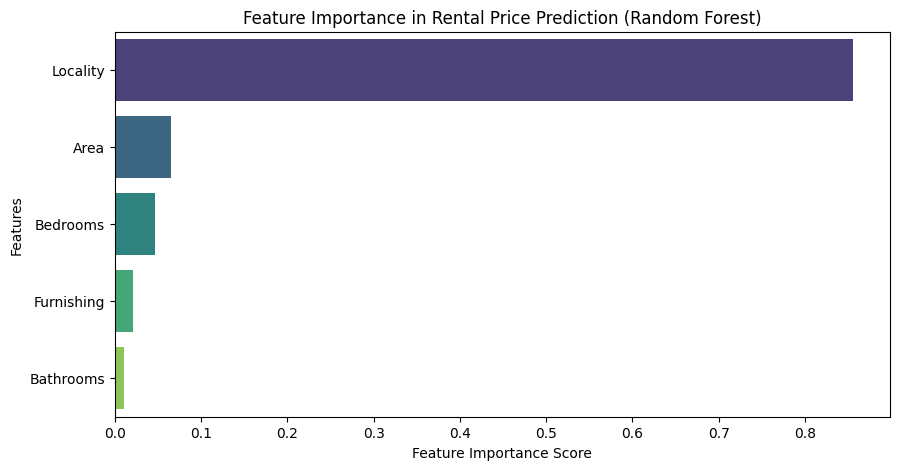

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

best_rf = randomcv_models[0][1].fit(X_train, y_train)
feature_importance = best_rf.feature_importances_

importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Rental Price Prediction (Random Forest)")
plt.show()


C:\Users\akhil\AppData\Local\Temp\ipykernel_28696\3426900653.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importance_df["Importance"], y=xgb_importance_df["Feature"], palette="plasma")


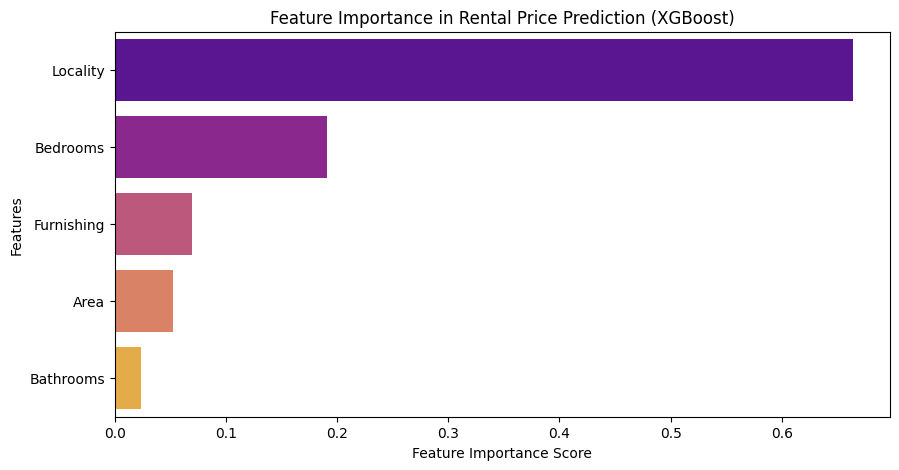

In [ ]:
xgb_importance = xg.feature_importances_

xgb_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": xgb_importance})
xgb_importance_df = xgb_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=xgb_importance_df["Importance"], y=xgb_importance_df["Feature"], palette="plasma")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Rental Price Prediction (XGBoost)")
plt.show()

In [ ]:
X_train.columns

Index(['Bedrooms', 'Bathrooms', 'Furnishing', 'Area', 'Locality'], dtype='object')

In [ ]:
new_property = np.array([[3,2,1,1500,"Papulguda"]])
new_property_df = pd.DataFrame(new_property, columns=X.columns)
new_property_df['Bedrooms'] = new_property_df['Bedrooms'].astype(float)
new_property_df['Bathrooms'] = new_property_df['Bathrooms'].astype(float)
new_property_df['Furnishing'] = new_property_df['Furnishing'].astype(float)
new_property_df['Area'] = new_property_df['Area'].astype(float)
new_property_df['Locality'] = new_property_df['Locality'].map(locality_price_map)

rf_prediction = random.predict(new_property_df)
xgb_prediction = xg.predict(new_property_df)

print(f"Random Forest Prediction: {rf_prediction[0]:.2f}")
print(f"XGBoost Prediction: {xgb_prediction[0]:.2f}")


Random Forest Prediction: 10.54
XGBoost Prediction: 10.70


In [ ]:
rf_prediction_actual = np.expm1(rf_prediction[0])
xgb_prediction_actual = np.expm1(xgb_prediction[0])

print(f"Actual Rent (Random Forest): {rf_prediction_actual:.2f} per month")
print(f"Actual Rent (XGBoost): {xgb_prediction_actual:.2f} per month")

Actual Rent (Random Forest): 37976.00 per month
Actual Rent (XGBoost): 44407.71 per month
